<h1>Exploratory and Predictive Analysis on Heart Disease</h1>

<h4>by Jason Devers and Erica Marghescu</h4>

---

<h2>Introduction</h2>

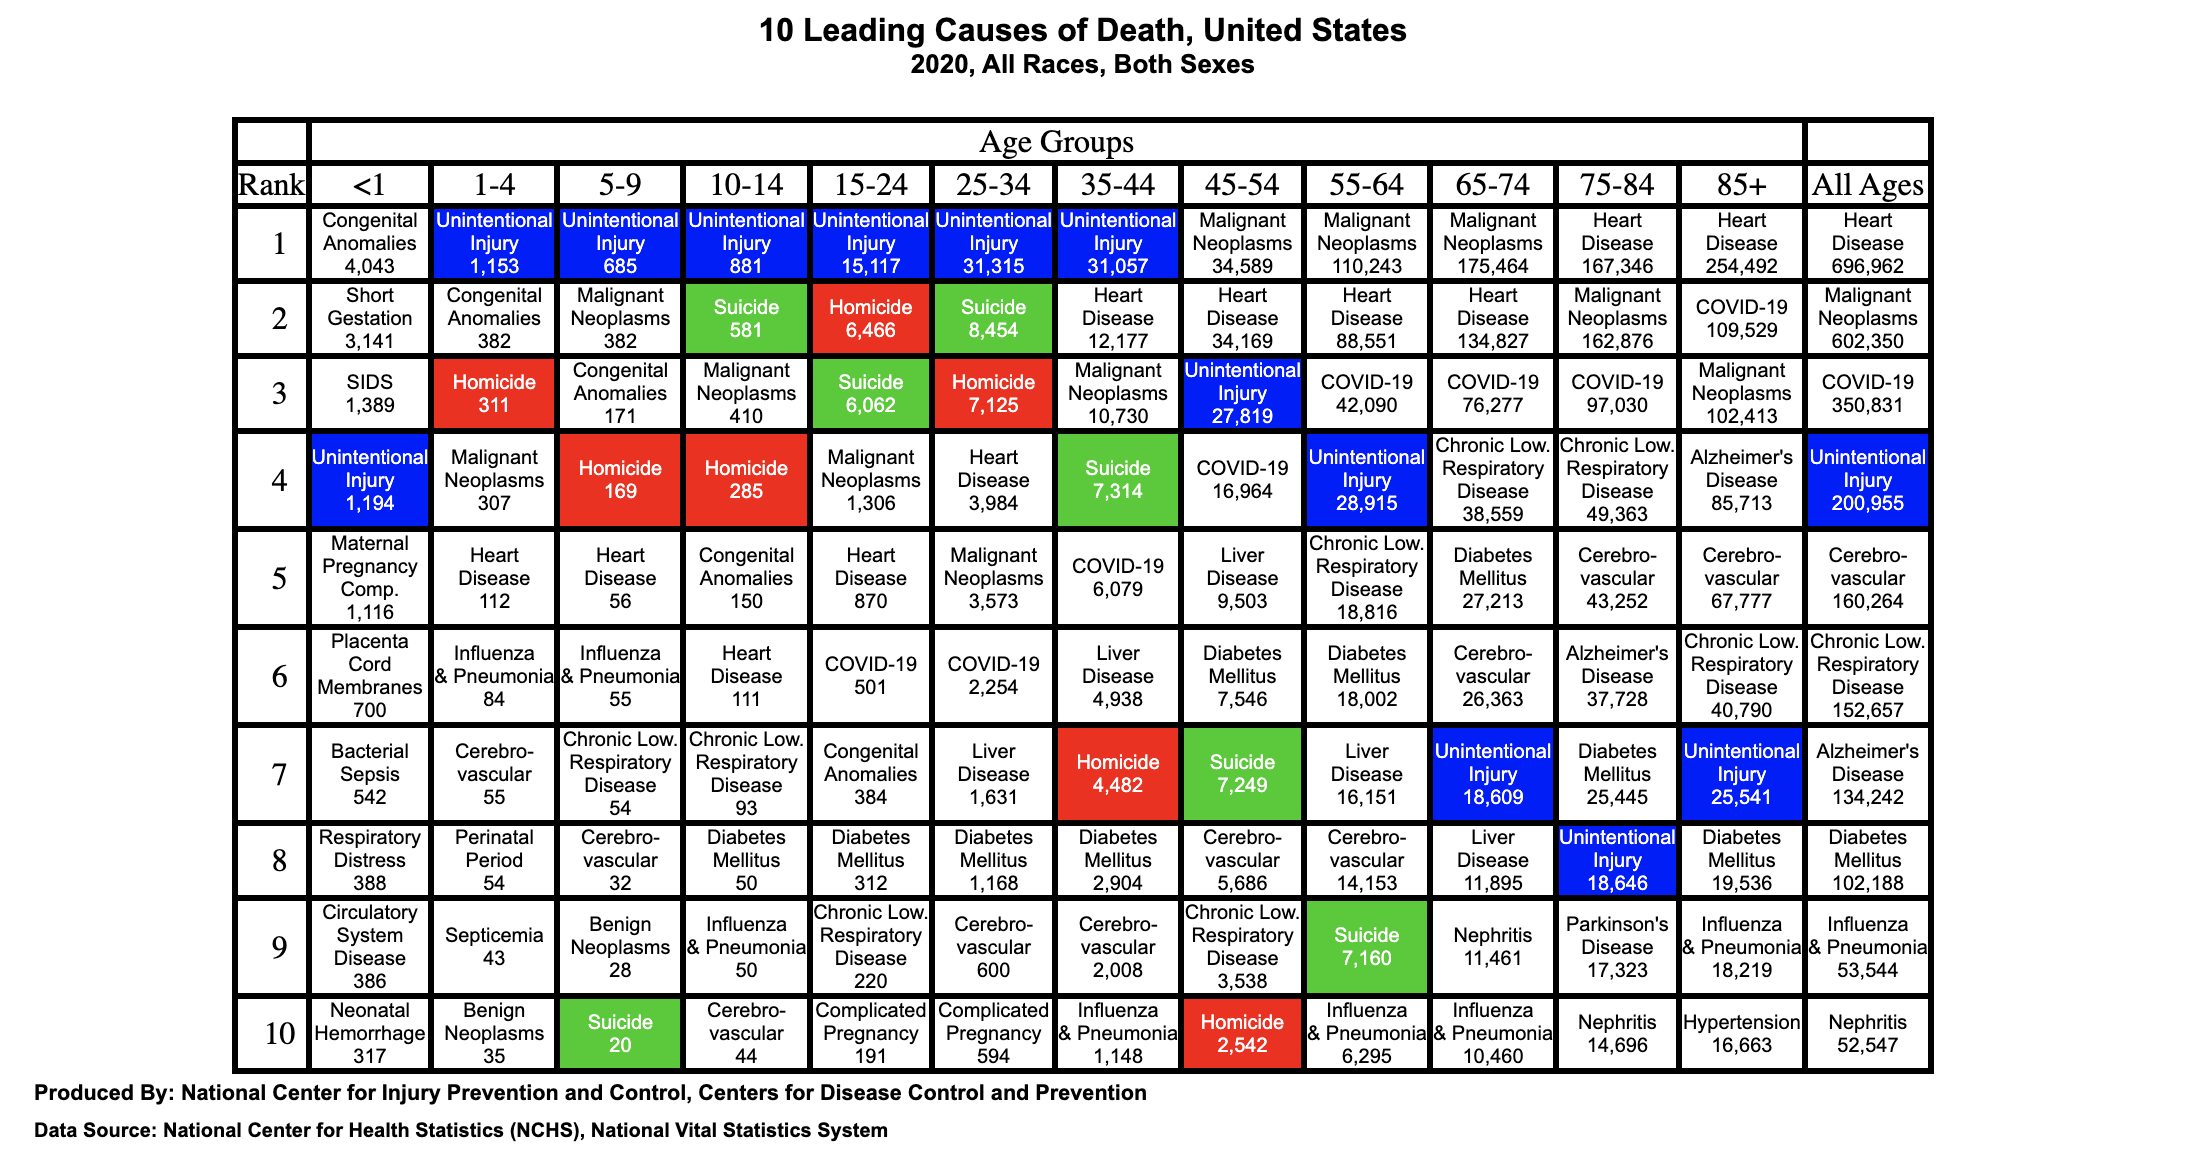

According to the [CDC](https://wisqars.cdc.gov/fatal-leading), heart disease is the _#1 leading cause of death_ across all ages, races, and sexes in the Unites States. Causing almost 700 thousand deaths over the past 20 years, it is a disease that has afflicted many families over time, and affected us personally as well. Jason's father passed away from a heart attack when he was 9. It was very unexpected, and in those times he felt almost powerless. Now, having knowledge of computer science and data science, he wanted to see if we could use the skills we learned in this class to try and make some sense out of this unexpected tragedy. Which brings us to our motivation-- **what demographic and health profiles are most prone to heart disease?**

In this tutorial, we will perform some exploratory data analysis to gain insights about our dataset and draw initial conclusions, use inferential statistics to determine the health profile of individuals who are most prone to heart disease, and build several classifiers to predict whether or not someone will have heart disease based on their demographic and health profile. 

<h2>Data Collection</h2>

In this tutorial, we make use of Python3, along with several key libraries such as [pandas](https://pandas.pydata.org/docs/), [matplotlib](https://matplotlib.org/stable/index.html), [seaborn](https://seaborn.pydata.org/), [statsmodels](https://www.statsmodels.org/stable/index.html), and more.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.patches
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.weightstats

/opt/conda/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


We start by collecting and displaying our data from an [online dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?resource=download&select=heart.csv):

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We add a key here for easy reference in understanding the variable names. Please visit this [resource](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/discussion/329925?resource=download&select=heart.csv) for a more detailed description.

<h4>Variable Descriptions</h4>

<h5>Continuous Variables</h5>

>**age**: years <br>

>**trtbps** (_resting blood pressure_): mm/hg <br>

>**chol** (_serum cholesterol_): mg/dl <br>

>**thalachh** (_maximum heart rate achieved_): bpm <br>

>**oldpeak** (_ST depression induced by exercise relative to rest_): mm <br>

<h5>Categorical Variables</h5>

>**sex**: <br> 
>0 = female <br>
>1 = male <br>

>**cp** (_chest pain type_): <br>
>0 = typical angina <br>
>1 = atypical angina <br>
>2 = non-anginal pain <br>
>3 = asymptomatic <br>

>**fbs** (_fasting blood sugar_): <br>
>0 = lower than or equal to 120 mg/dl <br>
>1 = greater than 120 mg/dl <br>

>**restecg** (_resting ECG_): <br>
>0 = normal <br>
>1 = ST-T wave abnormality <br>
>2 = left ventricular hypertrophy <br>

>**exng** (_exercise induced angina_): <br>
>0 = no <br>
>1 = yes <br>

>**slp** (_slope of the peak exercise ST segment_): <br>
>0 = upsloping <br>
>1 = flat <br>
>2 = downsloping <br>

>**caa** (_number of major vessels_): <br>
>0 = no major vessels <br>
>1 = 1 major vessel <br>
>2 = 2 major vessels <br>
>3 = 3 major vessels <br>
>4 = null <br>

>**thall** (_thalassemia_): <br>
>1 = fixed defect <br>
>2 = normal <br>
>3 = reversible defect <br>

>**output**: <br>
>0 = no heart disease <br>
>1 = heart disease <br>

<h2>Data Management and Representation</h2>

We then want to perform some data cleaning and processing so that our data is easier to work with. We start by checking if there are any missing values in the dataset:

In [3]:
df.info()
df.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

There are no empty values in our dataset, which is good. However, there can be mistakes in classification. Let's check that:

In [4]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

We then identify and remove any outliers in our data:

In [5]:
continuous_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
for feature in continuous_features:
   feature_data = df[feature]
   Q1 = np.percentile(feature_data, 25.)
   Q3 = np.percentile(feature_data, 75.)
   IQR = Q3 - Q1
   outlier_step = IQR * 1.5
   outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
   df.drop(outliers, inplace=True, errors='ignore')

We then run a statistics summary to check the categorical variables and ensure their minimum and maximum values are reasonable:

In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,53.992958,0.700704,0.989437,129.911972,242.077465,0.140845,0.524648,150.042254,0.316901,0.948592,1.429577,0.707746,2.295775,0.559859
std,9.161678,0.458758,1.031258,15.368133,44.753834,0.348476,0.514206,22.692716,0.466090,1.026141,0.599150,1.003075,0.609567,0.497280
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.750000,0.000000,0.000000,120.000000,209.750000,0.000000,0.000000,133.750000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.250000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,4.000000,3.000000,1.000000


Lastly, we change the labeling for better visualization and interpretation:

In [7]:
df_visual = pd.DataFrame()
df_visual['sex'] = df.sex.replace({0: "Female", 1: "Male"})
df_visual['cp'] = df.cp.replace({0: "Typical Angina", 
                          1: "Atypical Angina", 
                          2: "Non-Anginal Pain",
                          3: "Symptomatic"})
df_visual['fbs'] = df.fbs.replace({0: "False", 1: "True"})
df_visual['restecg'] = df.restecg.replace({0: "normal", 1: "ST-T Wave Abnormality", 2: "Left Ventricular Hypertrophy"})
df_visual['exng'] = df.exng.replace({1: "Yes", 0: "No"})
df_visual['slp'] = df.slp.replace({0: "Upsloping", 1: "Flat", 2:"Downsloping"})
df_visual['thall'] = df.thall.replace({0: "Null", 1: "Fixed Defect", 2: "Reversible Defect", 3: "Normal"})
df_visual['output'] = df.output.replace({1: "Heart Disease", 0: "No Heart Disease"})
df['output_name'] = df.output.replace({1: "Heart Disease", 0: "No Heart Disease"})

**EXPLORATORY DATA ANALYSIS**

We first visualize the distributions for each of the variables and draw conclusions based off these plots:

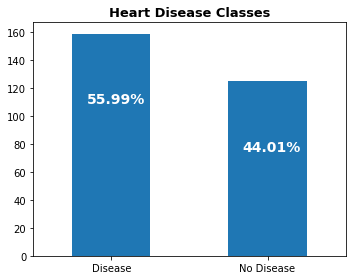

In [8]:
fig, ax = plt.subplots(figsize=(5,4))
name = ["Disease", "No Disease"]
ax = df_visual.output.value_counts().plot(kind='bar')
ax.set_title("Heart Disease Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
    
plt.tight_layout()

**Conclusion**: _There are more patients with a heart disease than without._

Text(0.5, 1.0, 'Age Distribution')

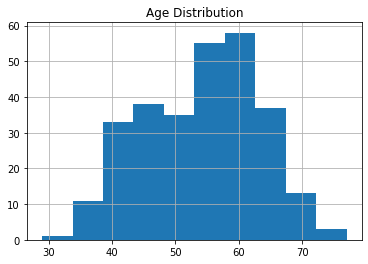

In [9]:
df['age'].hist().plot(kind='bar')
plt.title('Age Distribution')

**Conclusion**: _The age of patients is normally distributed._

Text(0.5, 1.0, 'Sex Distribution')

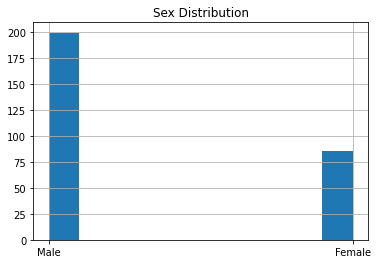

In [10]:
df_visual['sex'].hist().plot(kind='bar')
plt.title('Sex Distribution')

**Conclusion**: _There were more males included in this dataset than females._

Text(0.5, 1.0, 'Chest Pain Distribution')

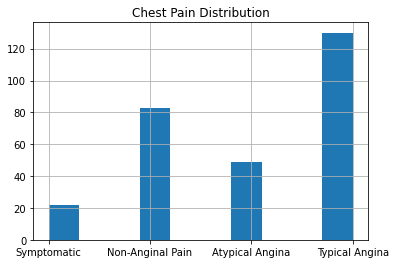

In [11]:
df_visual['cp'].hist().plot(kind='bar')
plt.title('Chest Pain Distribution')

**Conclusion**: _Typical Angina was the most common chest pain type among patients in this dataset._

Text(0.5, 1.0, 'Resting Blood Pressure Distribution')

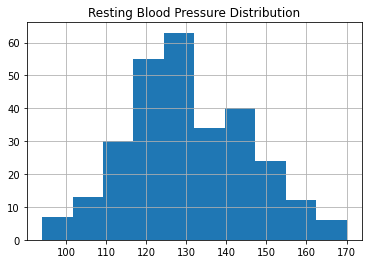

In [12]:
df['trtbps'].hist().plot(kind='bar')
plt.title('Resting Blood Pressure Distribution')

**Conclusion**: _Resting blood pressure among patients is normally distributed._

Text(0.5, 1.0, 'Cholesterol Distribution')

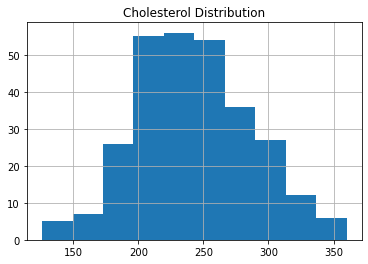

In [13]:
df['chol'].hist().plot(kind='bar')
plt.title('Cholesterol Distribution')

**Conclusion**: _Cholesterol among patients is normally distributed._

Text(0.5, 1.0, 'Fasting Blood Sugar Distribution')

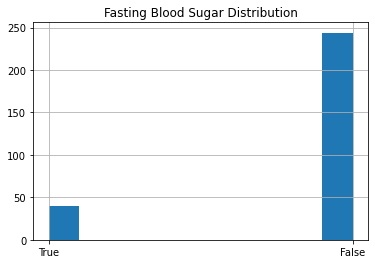

In [14]:
df_visual['fbs'].hist().plot(kind='bar')
plt.title('Fasting Blood Sugar Distribution')

**Conclusion**: _It was not common for patients in this dataset to have a fasting blood sugar higher than 120 mg/dl (indicator of diabetes)._

Text(0.5, 1.0, 'Resting ECG Distribution')

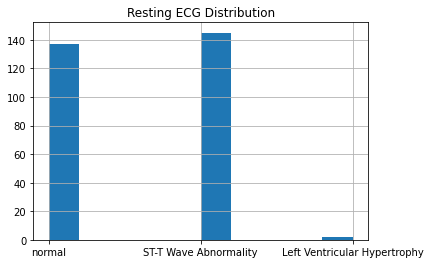

In [15]:
df_visual['restecg'].hist().plot(kind='bar')
plt.title('Resting ECG Distribution')

**Conclusion**: _Most patients had either a normal resting ECG or an ST-T Wave Abnormality._

Text(0.5, 1.0, 'Maximum Heart Rate Distribution')

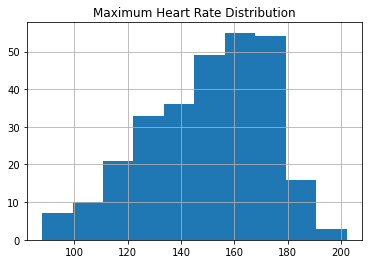

In [16]:
df['thalachh'].hist().plot(kind='bar')
plt.title('Maximum Heart Rate Distribution')

**Conclusion**: _The maximum heart rate of patients in this dataset are skewed left._

Text(0.5, 1.0, 'Exercise-Induced Angina Distribution')

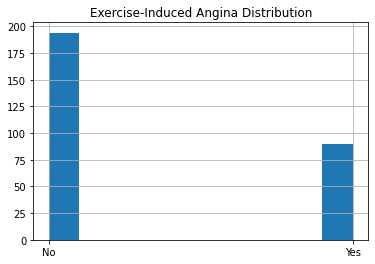

In [17]:
df_visual['exng'].hist().plot(kind='bar')
plt.title('Exercise-Induced Angina Distribution')

**Conclusion**: _Most patients in this dataset did not have Exercise-Induced Angina._

Text(0.5, 1.0, 'Exercise-Induced ST Depression Distribution')

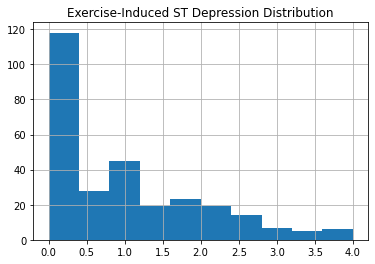

In [18]:
df['oldpeak'].hist().plot(kind='bar')
plt.title('Exercise-Induced ST Depression Distribution')

**Conclusion**: _Exercise-Induced ST Depression for patients in this dataset is skewed right._

Text(0.5, 1.0, 'Slope Distribution')

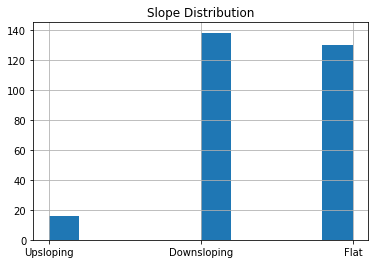

In [19]:
df_visual['slp'].hist().plot(kind='bar')
plt.title('Slope Distribution')

**Conclusion**: _Most patients in this dataset had either a flat or downsloping slope of their peak exercise ST segment._

Text(0.5, 1.0, 'Number of Major Vessels Distribution')

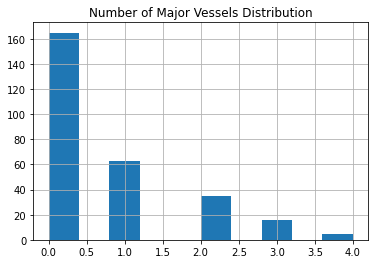

In [20]:
df['caa'].hist().plot(kind='bar')
plt.title('Number of Major Vessels Distribution')

**Conclusion**: _Most patients in this dataset had 0 major vessels._

Text(0.5, 1.0, 'Thalassemia Distribution')

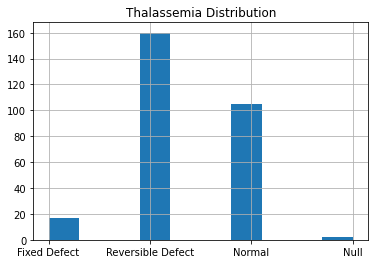

In [21]:
df_visual['thall'].hist().plot(kind='bar')
plt.title('Thalassemia Distribution')

**Conclusion**: _Most patients in this dataset either had a normal or reversible defect._

Now, let's take a look at the correlation between all these variables:

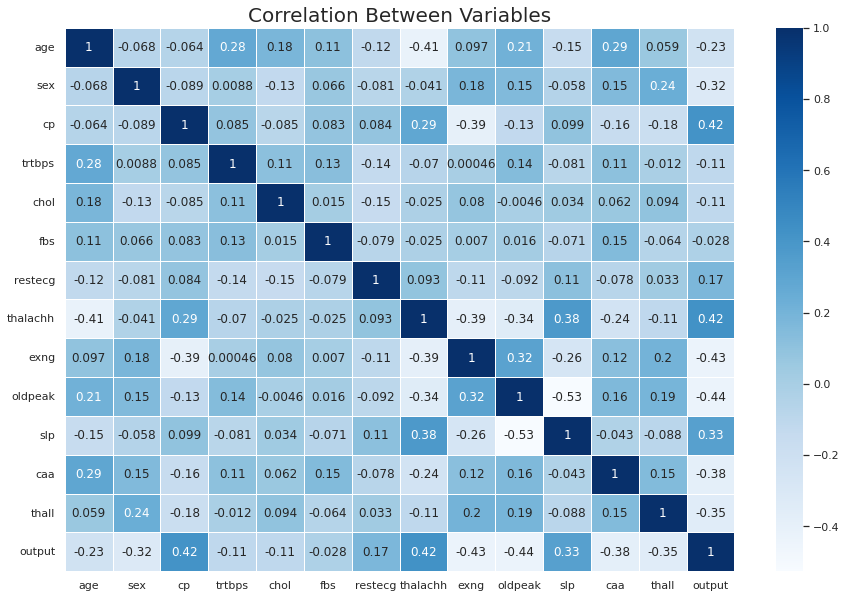

In [22]:
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Correlation Between Variables', fontsize = 20)
plt.show()

Next, let's visualize these factors according to whether or not each patient has heart disease and draw conclusions based off these plots:

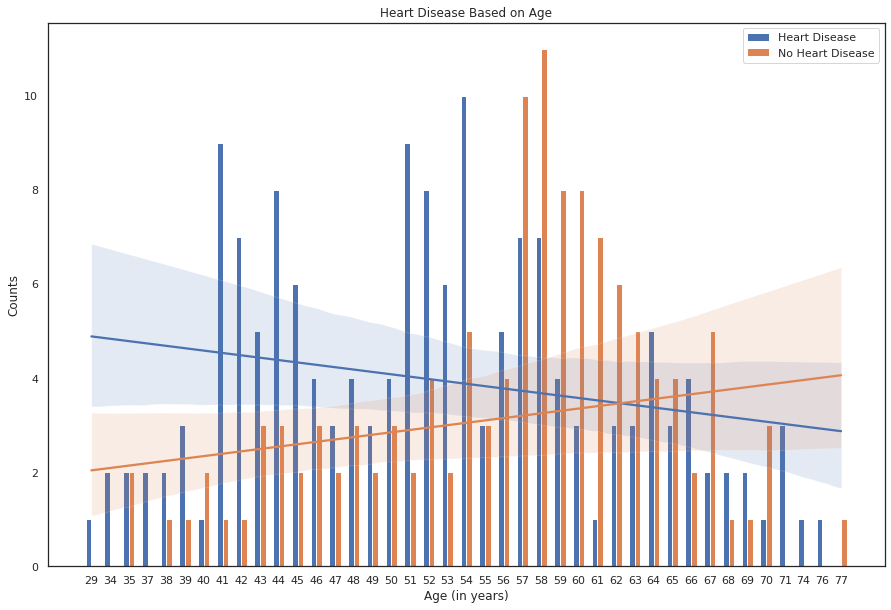

In [23]:
# Visualize how age influences heart disease

# Prepare data for plotting
df_copy = pd.DataFrame({'age': df.sort_values(by = ['age'])['age'].unique(), 'heart disease': np.nan, 'no heart disease': np.nan})
for age in df.sort_values(by = ['age'])['age'].unique():
   idx = df_copy.index[df_copy['age'] == age]
   num_heart_diseases = len(df.loc[(df['age'] == age) & (df['output'] == 1)]['output'])
   num_no_heart_diseases = len(df.loc[(df['age'] == age) & (df['output'] == 0)]['output'])
   df_copy.loc[idx, 'heart disease'] = num_heart_diseases
   df_copy.loc[idx, 'no heart disease'] = num_no_heart_diseases
   
# Plot data
labels = df_copy['age']
x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize = (15, 10))
bar1 = ax.bar(x - width/2, df_copy['heart disease'], width, label="Heart Disease")
bar2 = ax.bar(x + width/2, df_copy['no heart disease'], width, label="No Heart Disease")

# Plot regression lines

sns.regplot(x = df_copy.index, y = 'heart disease', data = df_copy, ax = ax, scatter_kws={'s': 0})
sns.regplot(x = df_copy.index, y = 'no heart disease', data = df_copy, ax = ax, scatter_kws={'s': 0})

ax.set_ylabel("Counts")
ax.set_title("Heart Disease Based on Age")
ax.set_xlabel("Age (in years)")
ax.set_xticks(x, labels)
ax.legend()
plt.show() 

**Conclusion**: _According to this sample of data, the older a patient was, the less likely it was for them to have heart disease._

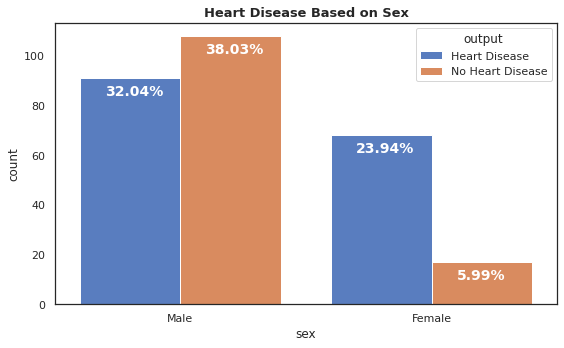

In [24]:
# Visualize how sex influences heart disease

fig, ax = plt.subplots(figsize=(8,5))
name = df_visual['sex']
ax = sns.countplot(x='sex', hue='output', data=df_visual, palette='muted')
ax.set_title("Heart Disease Based on Sex", fontsize = 13, weight = 'bold')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-7,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

**Conclusion**: _Among diseased patients, there are more males than females._

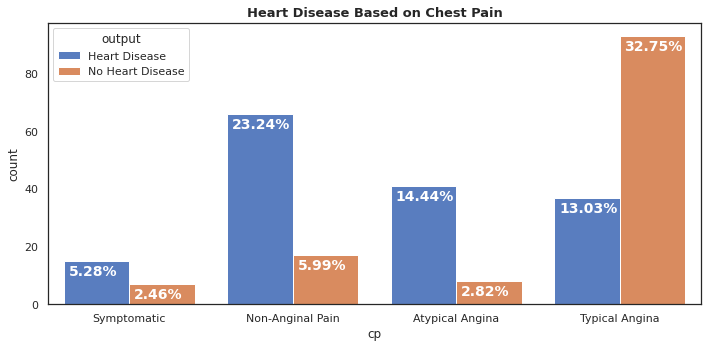

In [25]:
# Visualize how chest pain influences heart disease

fig, ax = plt.subplots(figsize=(10,5))
name = df_visual['cp']
ax = sns.countplot(x='cp', hue='output', data=df_visual, palette='muted')
ax.set_title("Heart Disease Based on Chest Pain", fontsize = 13, weight = 'bold')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

**Conclusion**: _Among healthy patients, many experience chest pain, likely due to external factors such as stress levels, gender, and physical activities._

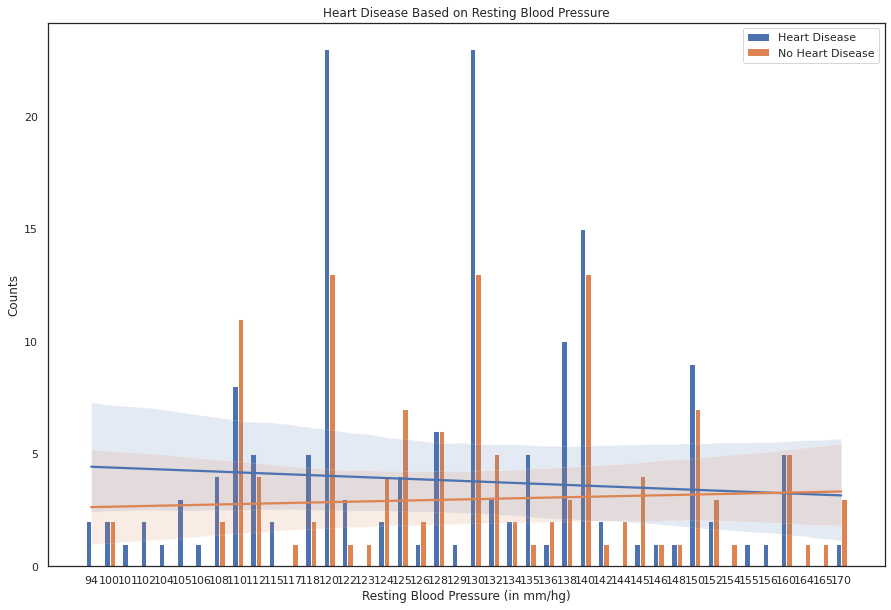

In [26]:
# Visualize how resting blood pressure influences heart disease

# Prepare data for plotting
df_copy = pd.DataFrame({'trtbps': df.sort_values(by = ['trtbps'])['trtbps'].unique(), 'heart disease': np.nan, 'no heart disease': np.nan})
for trtbps in df.sort_values(by = ['trtbps'])['trtbps'].unique():
   idx = df_copy.index[df_copy['trtbps'] == trtbps]
   num_heart_diseases = len(df.loc[(df['trtbps'] == trtbps) & (df['output'] == 1)]['output'])
   num_no_heart_diseases = len(df.loc[(df['trtbps'] == trtbps) & (df['output'] == 0)]['output'])
   df_copy.loc[idx, 'heart disease'] = num_heart_diseases
   df_copy.loc[idx, 'no heart disease'] = num_no_heart_diseases
   
# Plot data
labels = df_copy['trtbps']
x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize = (15, 10))
bar1 = ax.bar(x - width/2, df_copy['heart disease'], width, label="Heart Disease")
bar2 = ax.bar(x + width/2, df_copy['no heart disease'], width, label="No Heart Disease")

# Plot regression lines

sns.regplot(x = df_copy.index, y = 'heart disease', data = df_copy, ax = ax, scatter_kws={'s': 0})
sns.regplot(x = df_copy.index, y = 'no heart disease', data = df_copy, ax = ax, scatter_kws={'s': 0})

ax.set_ylabel("Counts")
ax.set_title("Heart Disease Based on Resting Blood Pressure")
ax.set_xlabel("Resting Blood Pressure (in mm/hg)")
ax.set_xticks(x, labels)
ax.legend()
plt.show() 

**Conclusion**: _According to this sample of data, the higher a patient's resting blood pressure was, the less likely it was for them to have heart disease._

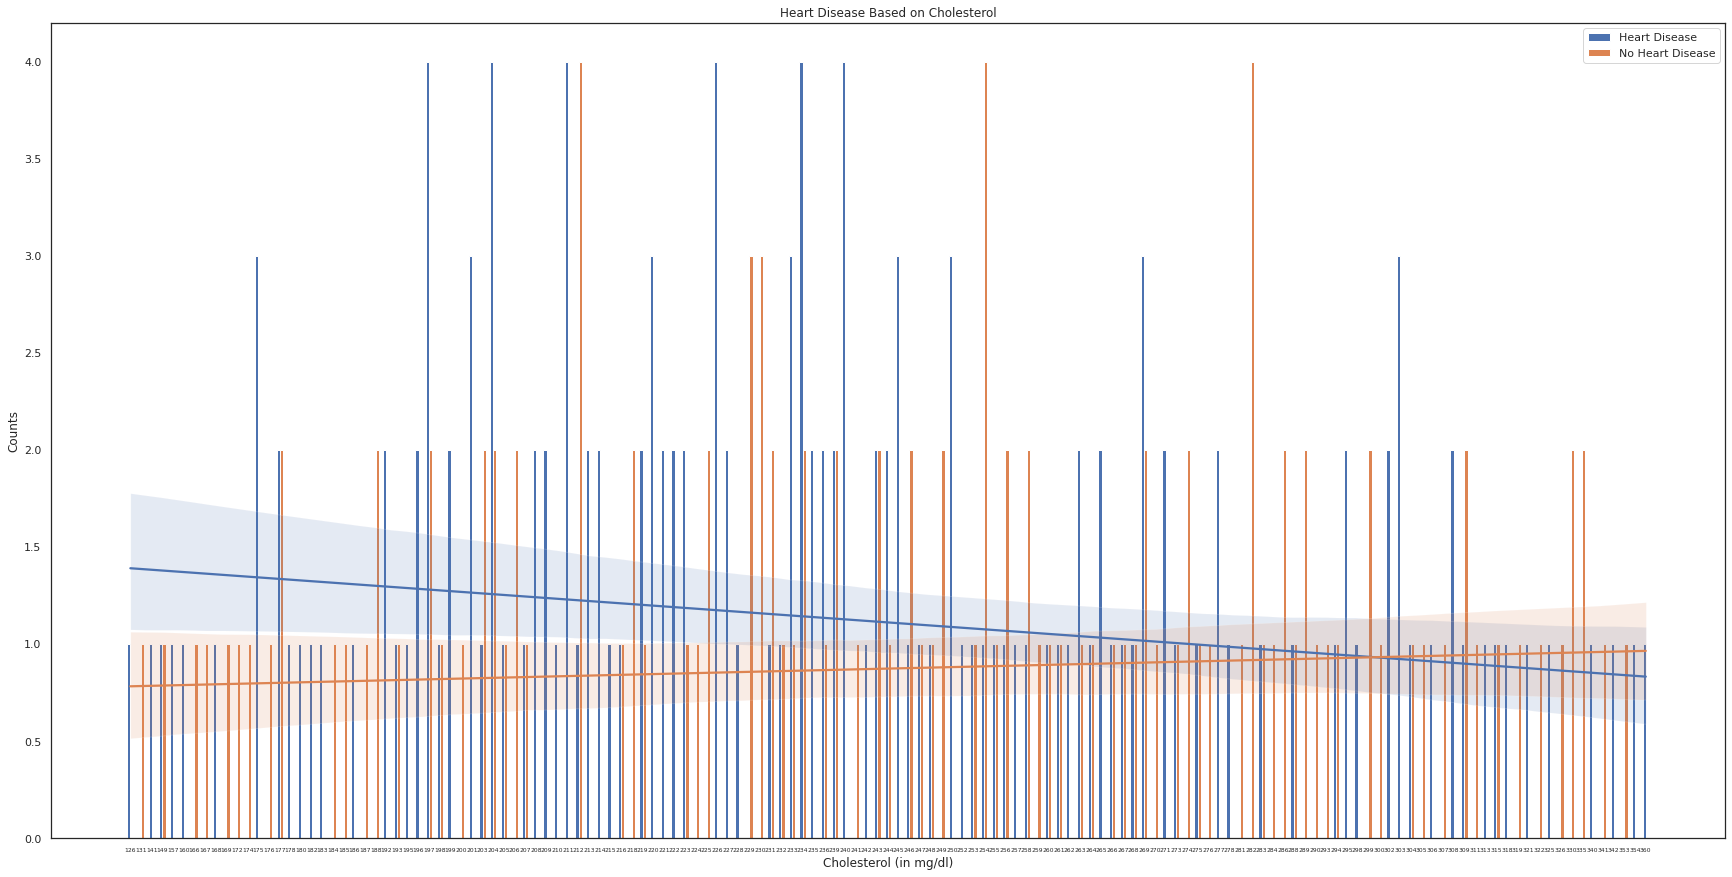

In [27]:
# Visualize how cholesterol influences heart disease

# Prepare data for plotting
df_copy = pd.DataFrame({'chol': df.sort_values(by = ['chol'])['chol'].unique(), 'heart disease': np.nan, 'no heart disease': np.nan})
for chol in df.sort_values(by = ['chol'])['chol'].unique():
   idx = df_copy.index[df_copy['chol'] == chol]
   num_heart_diseases = len(df.loc[(df['chol'] == chol) & (df['output'] == 1)]['output'])
   num_no_heart_diseases = len(df.loc[(df['chol'] == chol) & (df['output'] == 0)]['output'])
   df_copy.loc[idx, 'heart disease'] = num_heart_diseases
   df_copy.loc[idx, 'no heart disease'] = num_no_heart_diseases
   
# Plot data
labels = df_copy['chol']
x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize = (30, 15))
bar1 = ax.bar(x - width/2, df_copy['heart disease'], width, label="Heart Disease")
bar2 = ax.bar(x + width/2, df_copy['no heart disease'], width, label="No Heart Disease")

# Plot regression lines

sns.regplot(x = df_copy.index, y = 'heart disease', data = df_copy, ax = ax, scatter_kws={'s': 0})
sns.regplot(x = df_copy.index, y = 'no heart disease', data = df_copy, ax = ax, scatter_kws={'s': 0})

ax.set_ylabel("Counts")
ax.set_title("Heart Disease Based on Cholesterol")
ax.set_xlabel("Cholesterol (in mg/dl)")
ax.set_xticks(x, labels, fontsize=6)
ax.legend()
plt.show() 

**Conclusion**: _According to this sample of data, the higher a patient's cholesterol was, the less likely it was for them to have heart disease._

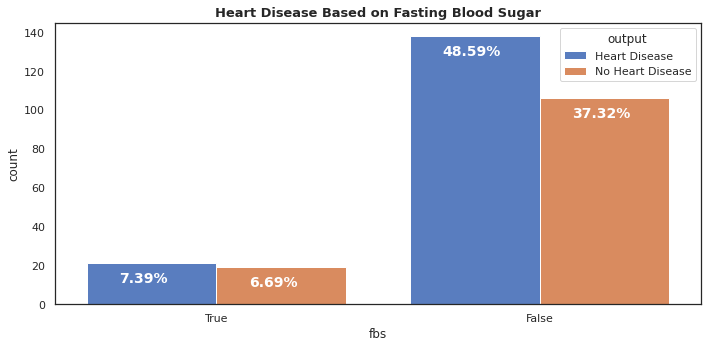

In [28]:
# Visualize how fasting blood sugar influences heart disease

fig, ax = plt.subplots(figsize=(10,5))
name = df_visual['fbs']
ax = sns.countplot(x='fbs', hue='output', data=df_visual, palette='muted')
ax.set_title("Heart Disease Based on Fasting Blood Sugar", fontsize = 13, weight = 'bold')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-10,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

**Conclusion**: _Most patients with heart disease do not have a fasting blood sugar higher than 120 mg/dl (indicator of Diabetes) which indicates that this may not be a strong feature for differentiation between patients with and without heart disease._

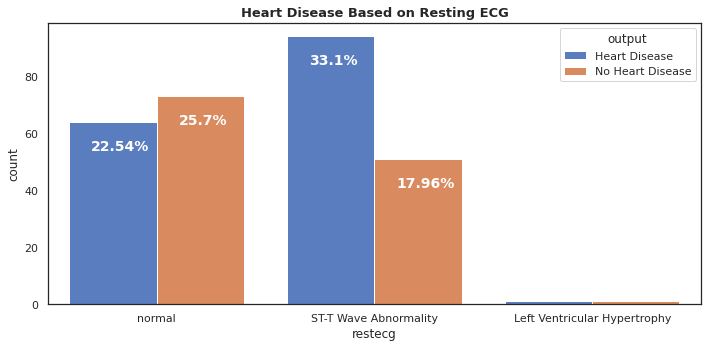

In [29]:
# Visualize how resting ECG influences heart disease

fig, ax = plt.subplots(figsize=(10,5))
name = df_visual['restecg']
ax = sns.countplot(x='restecg', hue='output', data=df_visual, palette='muted')
ax.set_title("Heart Disease Based on Resting ECG", fontsize = 13, weight = 'bold')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    if i.get_height() > 10:
        ax.text(i.get_x()+.1, i.get_height()-10,
                str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                    color='white', weight = 'bold')  
plt.tight_layout()

**Conclusion**: _Among patients with heart disease, the majority had an ST-T Wave Abnormality._

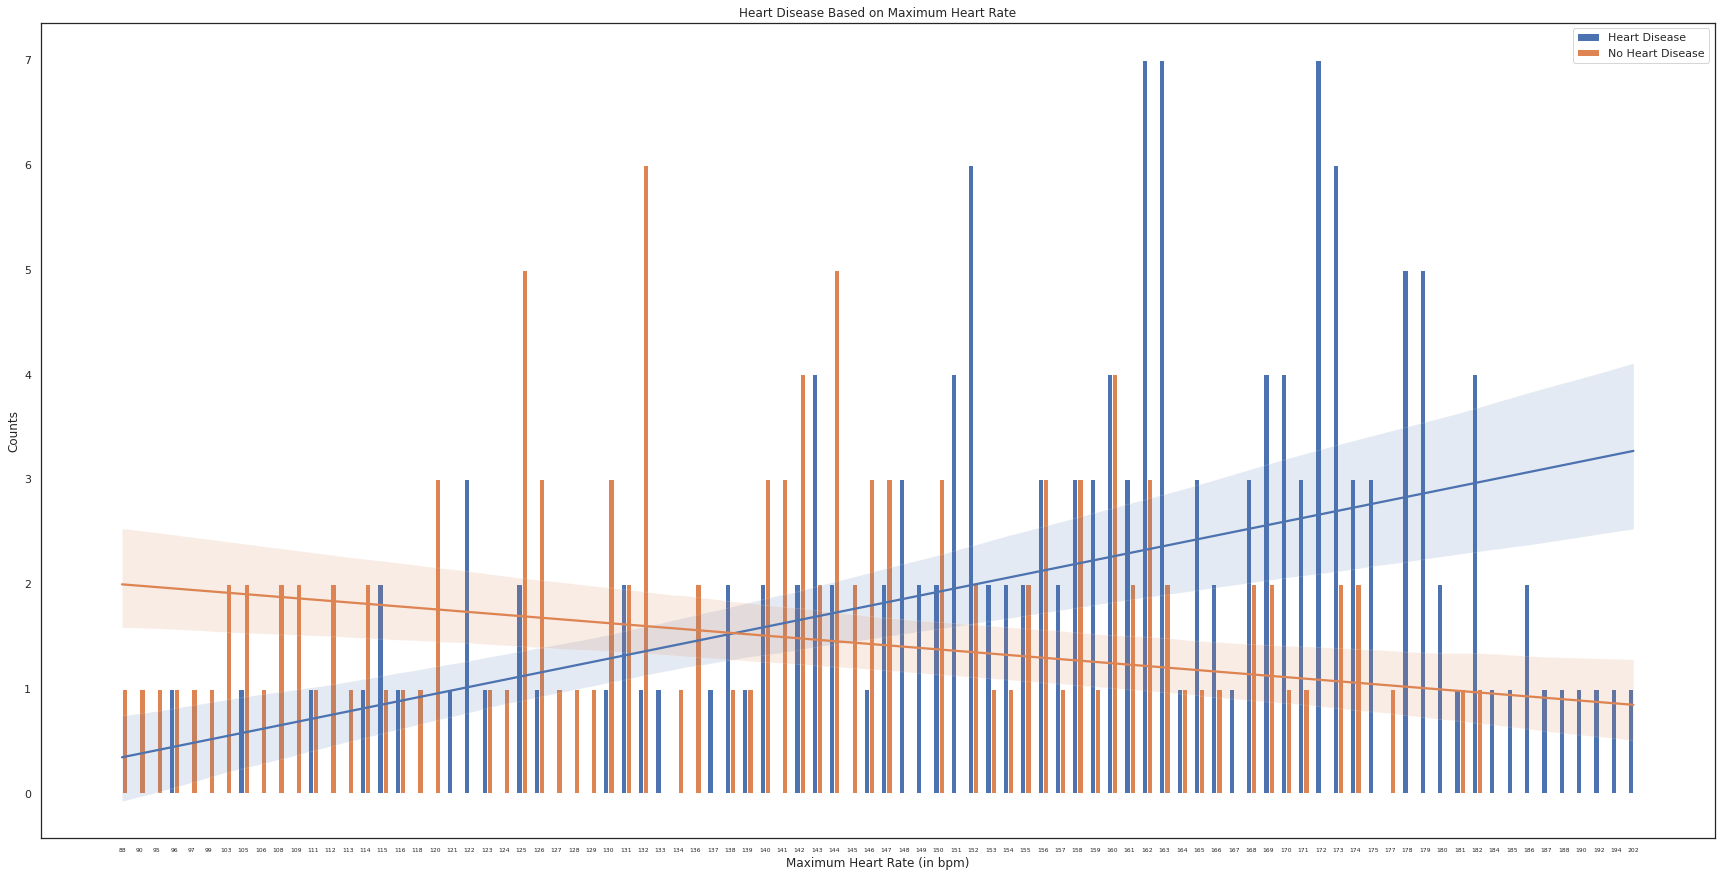

In [30]:
# Visualize how maximum heart rate influences heart disease

# Prepare data for plotting
df_copy = pd.DataFrame({'thalachh': df.sort_values(by = ['thalachh'])['thalachh'].unique(), 'heart disease': np.nan, 'no heart disease': np.nan})
for thalachh in df.sort_values(by = ['thalachh'])['thalachh'].unique():
   idx = df_copy.index[df_copy['thalachh'] == thalachh]
   num_heart_diseases = len(df.loc[(df['thalachh'] == thalachh) & (df['output'] == 1)]['output'])
   num_no_heart_diseases = len(df.loc[(df['thalachh'] == thalachh) & (df['output'] == 0)]['output'])
   df_copy.loc[idx, 'heart disease'] = num_heart_diseases
   df_copy.loc[idx, 'no heart disease'] = num_no_heart_diseases
   
# Plot data
labels = df_copy['thalachh']
x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize = (30, 15))
bar1 = ax.bar(x - width/2, df_copy['heart disease'], width, label="Heart Disease")
bar2 = ax.bar(x + width/2, df_copy['no heart disease'], width, label="No Heart Disease")

# Plot regression lines

sns.regplot(x = df_copy.index, y = 'heart disease', data = df_copy, ax = ax, scatter_kws={'s': 0})
sns.regplot(x = df_copy.index, y = 'no heart disease', data = df_copy, ax = ax, scatter_kws={'s': 0})

ax.set_ylabel("Counts")
ax.set_title("Heart Disease Based on Maximum Heart Rate")
ax.set_xlabel("Maximum Heart Rate (in bpm)")
ax.set_xticks(x, labels, fontsize=6)
ax.legend()
plt.show() 

**Conclusion**: _According to this sample of data, the higher a patient's maximum heart rate was, the more likely it was for them to have heart disease._

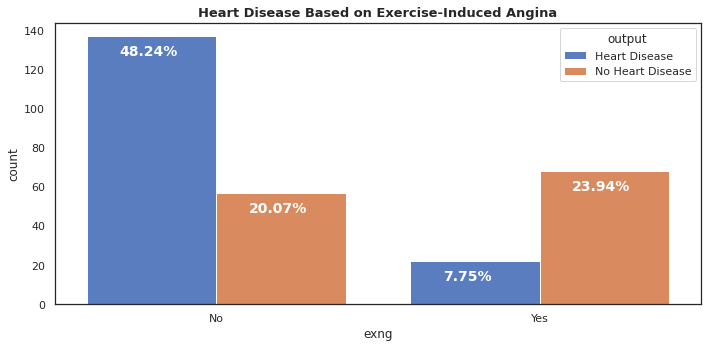

In [31]:
# Visualize how exercise-induced angina influences heart disease

fig, ax = plt.subplots(figsize=(10,5))
name = df_visual['exng']
ax = sns.countplot(x='exng', hue='output', data=df_visual, palette='muted')
ax.set_title("Heart Disease Based on Exercise-Induced Angina", fontsize = 13, weight = 'bold')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-10,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

**Conclusion**: _Among patients with heart disease, the majority did not have exercise-induced angina._

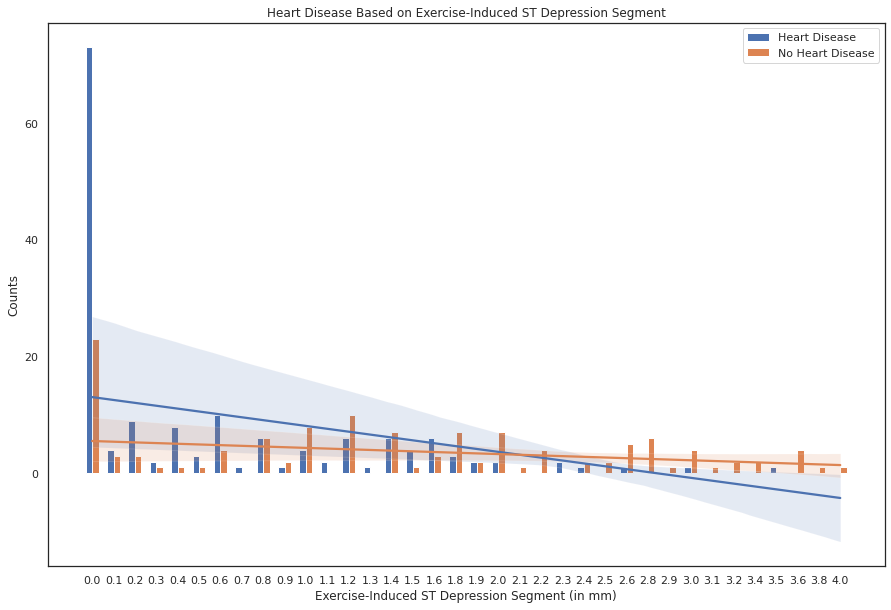

In [32]:
# Visualize how exercise-induced ST depression influences heart disease

# Prepare data for plotting
df_copy = pd.DataFrame({'oldpeak': df.sort_values(by = ['oldpeak'])['oldpeak'].unique(), 'heart disease': np.nan, 'no heart disease': np.nan})
for oldpeak in df.sort_values(by = ['oldpeak'])['oldpeak'].unique():
   idx = df_copy.index[df_copy['oldpeak'] == oldpeak]
   num_heart_diseases = len(df.loc[(df['oldpeak'] == oldpeak) & (df['output'] == 1)]['output'])
   num_no_heart_diseases = len(df.loc[(df['oldpeak'] == oldpeak) & (df['output'] == 0)]['output'])
   df_copy.loc[idx, 'heart disease'] = num_heart_diseases
   df_copy.loc[idx, 'no heart disease'] = num_no_heart_diseases
   
# Plot data
labels = df_copy['oldpeak']
x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize = (15, 10))
bar1 = ax.bar(x - width/2, df_copy['heart disease'], width, label="Heart Disease")
bar2 = ax.bar(x + width/2, df_copy['no heart disease'], width, label="No Heart Disease")

# Plot regression lines

sns.regplot(x = df_copy.index, y = 'heart disease', data = df_copy, ax = ax, scatter_kws={'s': 0})
sns.regplot(x = df_copy.index, y = 'no heart disease', data = df_copy, ax = ax, scatter_kws={'s': 0})

ax.set_ylabel("Counts")
ax.set_title("Heart Disease Based on Exercise-Induced ST Depression Segment")
ax.set_xlabel("Exercise-Induced ST Depression Segment (in mm)")
ax.set_xticks(x, labels)
ax.legend()
plt.show() 

**Conclusion**:  _According to this sample of data, the longer a patient's exercise-induced ST depression segment was, the less likely it was for them to have heart disease._

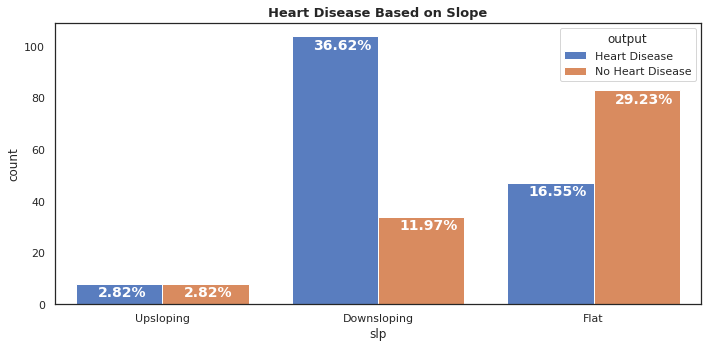

In [33]:
# Visualize how the slope of the peak of the exercise ST segment influences heart disease

fig, ax = plt.subplots(figsize=(10,5))
name = df_visual['slp']
ax = sns.countplot(x='slp', hue='output', data=df_visual, palette='muted')
ax.set_title("Heart Disease Based on Slope", fontsize = 13, weight = 'bold')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

**Conclusion**: _Among the patients with heart disease, a majority had a downsloping slope for the peak of their exercise ST segment._

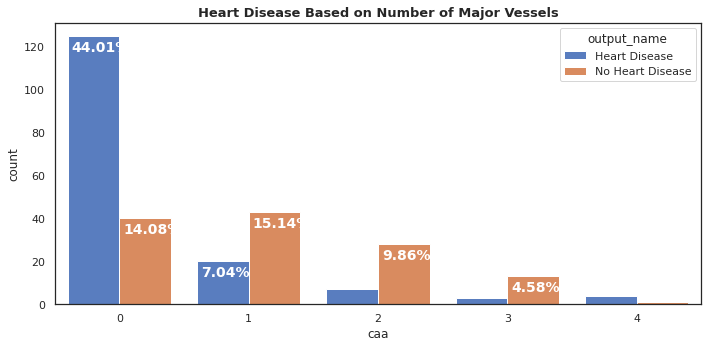

In [34]:
# Visualize how number of major vessels influences heart disease

fig, ax = plt.subplots(figsize=(10,5))
name = df['caa']
ax = sns.countplot(x='caa', hue='output_name', data=df, palette='muted')
ax.set_title("Heart Disease Based on Number of Major Vessels", fontsize = 13, weight = 'bold')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    if i.get_height() > 10:
        ax.text(i.get_x()+.03, i.get_height()-7,
                str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                    color='white', weight = 'bold')  
plt.tight_layout()

**Conclusion**: _Among patients with heart disease, a majority had 0 major vessels._

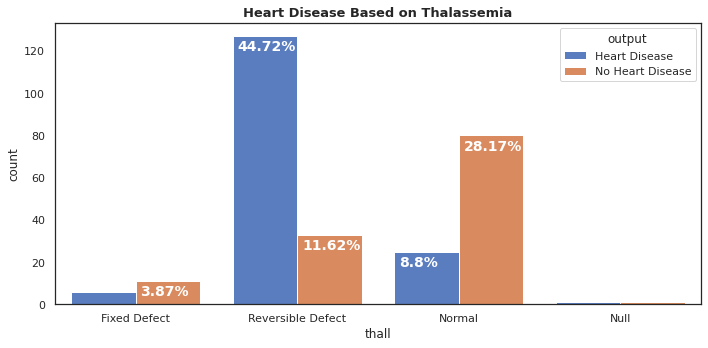

In [35]:
# Visualize how Thalassemia influences heart disease

fig, ax = plt.subplots(figsize=(10,5))
name = df_visual['thall']
ax = sns.countplot(x='thall', hue='output', data=df_visual, palette='muted')
ax.set_title("Heart Disease Based on Thalassemia", fontsize = 13, weight = 'bold')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    if i.get_height() > 10:
        ax.text(i.get_x()+.03, i.get_height()-7,
                str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                    color='white', weight = 'bold')  
plt.tight_layout()

**Conclusion**: _Among patients with heart disease, a majority had a reversible defect._

Lastly, let's visualize continuous variables together according to whether or not the patient had heart disease:

In [ ]:
continuous_features = ["age","trtbps","chol","thalachh","oldpeak"]
sns.pairplot(df[continuous_features + ['output_name']], hue='output_name')

**HYPOTHESIS TESTING**

To gain better insight on the demographic that is most prone to having a heart attack, we will obtain 95% confidence intervals for continuous variables with respect to patients with heart disease to determine their average values:

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17, 12))
categorical_features = ['exng','caa','cp','fbs','restecg','slp','thall']

for i, feature in enumerate(categorical_features):
   ax = axes[int(i/3), i%3]
   sns.histplot(data=df[(df['output'] == 1) & (df['sex'] == 1)], x=feature, ax=ax)

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17, 12))
categorical_features = ['exng','caa','cp','fbs','restecg','slp','thall']

for i, feature in enumerate(categorical_features):
   ax = axes[int(i/3), i%3]
   sns.histplot(data=df[(df['output'] == 1) & (df['sex'] == 0)], x=feature, ax=ax)

In [ ]:
male_data = []
male_data.append(statsmodels.stats.weightstats.DescrStatsW(df[(df['output'] == 1) & (df['sex'] == 1)]['age']).zconfint_mean())
male_data.append('Non-Anginal Pain')
male_data.append(statsmodels.stats.weightstats.DescrStatsW(df[(df['output'] == 1) & (df['sex'] == 1)]['trtbps']).zconfint_mean())
male_data.append(statsmodels.stats.weightstats.DescrStatsW(df[(df['output'] == 1) & (df['sex'] == 1)]['chol']).zconfint_mean())
male_data.append('<= 120 mg/dl')
male_data.append('ST-T Wave Abnormality')
male_data.append(statsmodels.stats.weightstats.DescrStatsW(df[(df['output'] == 1) & (df['sex'] == 1)]['thalachh']).zconfint_mean())
male_data.append('No')
male_data.append(statsmodels.stats.weightstats.DescrStatsW(df[(df['output'] == 1) & (df['sex'] == 1)]['oldpeak']).zconfint_mean())
male_data.append('Downsloping')
male_data.append('0')
male_data.append('Normal')

female_data = []
female_data.append(statsmodels.stats.weightstats.DescrStatsW(df[(df['output'] == 1) & (df['sex'] == 0)]['age']).zconfint_mean())
female_data.append('Non-Anginal Pain')
female_data.append(statsmodels.stats.weightstats.DescrStatsW(df[(df['output'] == 1) & (df['sex'] == 0)]['trtbps']).zconfint_mean())
female_data.append(statsmodels.stats.weightstats.DescrStatsW(df[(df['output'] == 1) & (df['sex'] == 0)]['chol']).zconfint_mean())
female_data.append('<= 120 mg/dl')
female_data.append('ST-T Wave Abnormality')
female_data.append(statsmodels.stats.weightstats.DescrStatsW(df[(df['output'] == 1) & (df['sex'] == 0)]['thalachh']).zconfint_mean())
female_data.append('No')
female_data.append(statsmodels.stats.weightstats.DescrStatsW(df[(df['output'] == 1) & (df['sex'] == 0)]['oldpeak']).zconfint_mean())
female_data.append('Downsloping')
female_data.append('0')
female_data.append('Normal')



Combining this information with insights about categorical variables gained from our exploratory data analysis, we can assemble a demographic and health profile for the most prone individual to a heart attack:

In [ ]:
rows = ['Age', 'Chest Pain', 'Resting Blood Pressure', 'Cholesterol', 'Fasting Blood Sugar', 'Resting ECG', 'Maximum Heart Rate', 'Exercise-Induced Angina', 'ST Depression Segment', 'Slope of Peak', 'Number of Major Vessels', 'Thalassemia']
cols = ['Male', 'Female']

fig, ax = plt.subplots(figsize=(11, 8))
ax.set_ylim(-1, 12)
ax.set_xlim(0, 3.5)
ax.text(x=1.5, y=11.75, s='Male', va='center', ha='center', weight='bold')
ax.text(x=2.75, y=11.75, s='Female', va='center', ha='center', weight='bold')

for i, row in enumerate(reversed(rows)):
   ax.text(x=.15, y=i, s=row, va='center', ha='left', fontsize=8, weight='bold')
   
for i, row in enumerate(reversed(male_data)):
   ax.text(x=1.5, y=i, s=row, va='center', ha='center', fontsize=8, weight='bold')
   
for i, row in enumerate(reversed(female_data)):
   ax.text(x=2.75, y=i, s=row, va='center', ha='center', fontsize=8, weight='bold')

for i, row in enumerate(rows):
    ax.plot(
    	[0, 4],
    	[i -.5, i - .5],
    	ls=':',
    	lw='.5',
    	c='grey'
    )
    
ax.plot([0, 4], [11.5, 11.5], lw='.5', c='black')

male_bg = matplotlib.patches.Rectangle(
   (.875, -.5), 1.25, 12, ec='none', fc='lightblue', alpha=.2, zorder=-1 
)

female_bg = matplotlib.patches.Rectangle(
   (2.125, -.5), 1.25, 12, ec='none', fc='lightgreen', alpha=.2, zorder=-1 
)

ax.add_patch(male_bg)
ax.add_patch(female_bg)
ax.axis('off')

In [ ]:
min_value = df['age'].min()
max_value = df['age'].max() 
bins = np.linspace(min_value,max_value,4)
labels = ['29-45', '45-61','61-77']
df['age_bins'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)
sns.histplot(df['age_bins'], bins=3)

In [ ]:
min_value = df['cp'].min()
max_value = df['cp'].max() 
bins = np.linspace(min_value,max_value,5)
labels = ['asymptomatic', 'typical_angina','atypical_angina', 'non_anginal']
df['cp_bins'] = pd.cut(df['cp'], bins=bins, labels=labels, include_lowest=True)
sns.histplot(df['cp_bins'], bins=3)

In [ ]:
# putting a name to chest pain to get dummy columns
classify = df.copy()
for index, row in classify.iterrows():
    if row['cp'] == 1:
        classify.at[index,'cp'] = 'typical_angina'
    elif row['cp'] == 2:
        classify.at[index, 'cp'] = 'atypical_angina'
    elif row['cp'] == 3:
        classify.at[index, 'cp'] = 'non_anginal'
    elif row['cp'] == 0:
        classify.at[index, 'cp'] = 'asymptomatic'
    

In [ ]:
# putting a name to sex to get dummy columns
for index, row in classify.iterrows():
    if row['sex'] == 1:
        classify.at[index,'sex'] = 'male'
    elif row['sex'] == 0:
        classify.at[index, 'sex'] = 'female'
classify

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score)

In [ ]:
dummies = pd.get_dummies(classify['sex'])
classify = pd.concat([classify, dummies], axis = 1)
dummies = pd.get_dummies(classify['cp'])
classify = pd.concat([classify, dummies], axis = 1)
dummies = pd.get_dummies(classify['output_name'])
classify = pd.concat([classify, dummies], axis = 1)
classify.columns

In [ ]:
train, test = train_test_split(classify, test_size = 0.2, stratify = classify['output'], random_state = 42)

In [ ]:
# looking at males within a certain age 
fn = ['male', 'age', 'asymptomatic', 'chol']
cn = ['output']

In [ ]:
X_train = train[fn]
y_train = train[cn]
X_test = test[fn]
y_test = test[cn]

In [ ]:
LogisticModel = sm.Logit(y_train, X_train).fit()
print(LogisticModel.summary())

In [ ]:
y_hat = LogisticModel.predict(X_test)
compare = pd.concat([y_test, y_hat], axis=1)
compare = compare.rename(columns={0: 'prediction'})
compare['difference'] = compare['output'] - compare['prediction']
compare.sort_values(by=['difference'])

prediction = list(map(round, y_hat)) 
# confusion matrix 
cm = confusion_matrix(y_test, prediction)  
print ("Confusion Matrix : \n", cm)  
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_test, prediction))

In [ ]:
# go through the residuals to generate a confusion matrix

def rating(difference):
    if difference > 0.5:
        return "false negative"
    elif difference >= 0:
        return "true positive"
    elif difference >= -0.5:
        return "true negative"
    else:
        return "false positive"

compare['type'] = compare.apply(lambda x: rating(x['difference']),axis=1)
true_positives = compare[compare['type'] == "true positive"].count()["type"]
true_negatives = compare[compare['type'] == "true negative"].count()["type"]
type_1_errors = compare[compare['type'] == "false positive"].count()["type"]
type_2_errors = compare[compare['type'] == "false negative"].count()["type"]
print("True positives: ", true_positives)
print("True negatives: ", true_negatives)
print("False positives: ", type_1_errors)
print("False negatives: ", type_2_errors)

In [ ]:
roc_auc_score(y_test, y_hat)

In [ ]:
# we then take a look at the ROC curve

fpr, tpr, threshold = roc_curve(y_test, y_hat)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
fn = ['asymptomatic', 'age', 'chol', 'male']
cn = ['Heart Disease', 'No Heart Disease']

In [ ]:
dt = DecisionTreeClassifier(max_depth = 2, random_state = 43)
dt.fit(X_train,y_train)
prediction = dt.predict(X_test)
print("The accuracy of the Decision Tree is","{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

In [ ]:
plt.figure(figsize = (10,8))
plot_tree(dt, feature_names = fn, class_names = cn, filled = True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
rf = RandomForestClassifier(max_depth=2, random_state=43)
rf.fit(X_train, y_train)
prediction = rf.predict(X_test)
print("The accuracy of the Random Forest is","{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

In [ ]:
plt.figure(figsize=(10,8))
plot_tree(rf.estimators_[0], feature_names=fn, class_names=cn, filled=True)

In [ ]:
fn = ['asymptomatic', 'age', 'chol', 'female']
cn = ['Heart Disease', 'No Heart Disease']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 17
# create an instance of neighbours classifier and fit data
clf = KNeighborsClassifier(n_neighbors, weights="distance")
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print("The accuracy of the K-Nearest Neighbors is","{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

In [ ]:
dt = DecisionTreeClassifier(max_depth = 2, random_state = 43)
dt.fit(X_train,y_train)
prediction = dt.predict(X_test)
print("The accuracy of the Decision Tree is","{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

In [ ]:
plt.figure(figsize = (10,8))
plot_tree(dt, feature_names = fn, class_names = cn, filled = True)

In [ ]:
categorical_features = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continuous_features = ["age","trtbps","chol","thalachh","oldpeak"]

In [ ]:
df_corr = df[continuous_features].corr().transpose()

In [ ]:
fn = ['asymptomatic', 'age', 'chol', 'male']
cn = ['Heart Disease', 'No Heart Disease']

In [ ]:
# go through the residuals to generate a confusion matrix

def rating(difference):
    if difference > 0.5:
        return "false negative"
    elif difference >= 0:
        return "true positive"
    elif difference >= -0.5:
        return "true negative"
    else:
        return "false positive"

compare['type'] = compare.apply(lambda x: rating(x['difference']),axis=1)
true_positives = compare[compare['type'] == "true positive"].count()["type"]
true_negatives = compare[compare['type'] == "true negative"].count()["type"]
type_1_errors = compare[compare['type'] == "false positive"].count()["type"]
type_2_errors = compare[compare['type'] == "false negative"].count()["type"]
print("True positives: ", true_positives)
print("True negatives: ", true_negatives)
print("False positives: ", type_1_errors)
print("False negatives: ", type_2_errors)

Let's find some correlations in our data 

In [ ]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
df_corr = df[continuous_features].corr().transpose()
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()